## Instalando bibliotecas

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.ticker import FuncFormatter

## Importando informações

In [6]:
# Carregar dados
serial_data = np.loadtxt('serial_total.csv', delimiter=',')
parallel_data = np.loadtxt('parallel_total.csv', delimiter=',')

# Dados e configurações
serial_sizes = serial_data[:, 0]
parallel_sizes = parallel_data[:, 0]
serial_results = serial_data[:, 1:]
parallel_results = parallel_data[:, 1:]

# Gerando gráficos

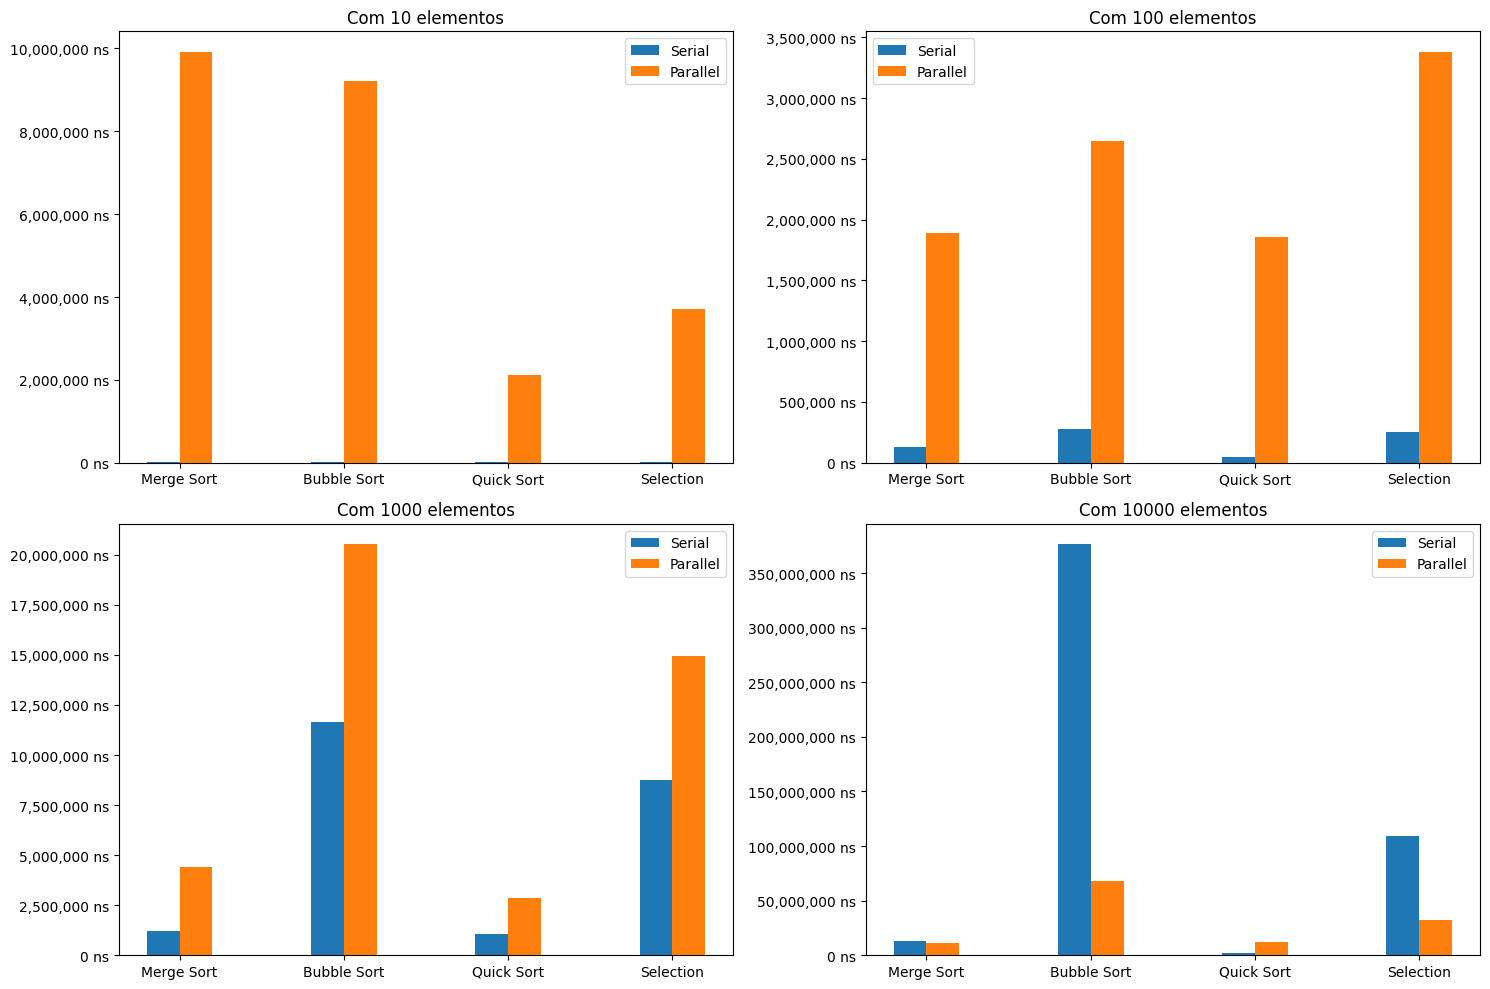

In [7]:
algorithms = ["Merge Sort", "Bubble Sort", "Quick Sort", "Selection"]
index = np.arange(len(algorithms))
lines, columns = 2, 2
largura_barra = 0.2

# Função para formatar o eixo y com 'ns'
def format_y(value, _):
    return f'{int(value):,} ns'  # Usa vírgulas para separar milhares, mantendo em nanossegundos

fig, axs = plt.subplots(lines, columns, figsize=(15, 10)) 

# Loop para gerar gráficos
for i in range(lines):
    for j in range(columns):
        ax = axs[i][j]
        
        # Dados específicos para o subplot
        serial_times = serial_results[i * columns + j]
        parallel_times = parallel_results[i * columns + j]
        
        # Criação das barras agrupadas
        ax.bar(index - largura_barra / 2, serial_times, largura_barra, label='Serial')
        ax.bar(index + largura_barra / 2, parallel_times, largura_barra, label='Parallel')
        
        # Configurações do eixo
        ax.set_xticks(index)
        ax.set_xticklabels(algorithms)
        ax.set_title(f'Com {int(parallel_sizes[i * columns + j])} elementos')
        ax.legend()
        
        # Aplicar formatação personalizada ao eixo y
        ax.yaxis.set_major_formatter(FuncFormatter(format_y))

# Exibir o gráfico
plt.tight_layout()
plt.show()